### Laptop price prediction

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [665]:
dataframe = pd.read_csv('./data/Price_euros_train.csv')

In [666]:
dataframe.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


In [667]:
dataframe['Company'].value_counts()

Dell         255
Lenovo       251
HP           232
Asus         135
Acer          91
MSI           44
Toshiba       41
Apple         17
Samsung        9
Mediacom       6
Microsoft      5
Razer          4
Xiaomi         4
Vero           4
Google         3
Fujitsu        3
Chuwi          2
LG             2
Name: Company, dtype: int64

In [668]:
dataframe['TypeName'].value_counts()

Notebook              627
Gaming                170
Ultrabook             166
2 in 1 Convertible    100
Workstation            25
Netbook                20
Name: TypeName, dtype: int64

In [669]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1097 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1055 non-null   object 
 11  Weight            1086 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


<AxesSubplot: xlabel='Inches', ylabel='Count'>

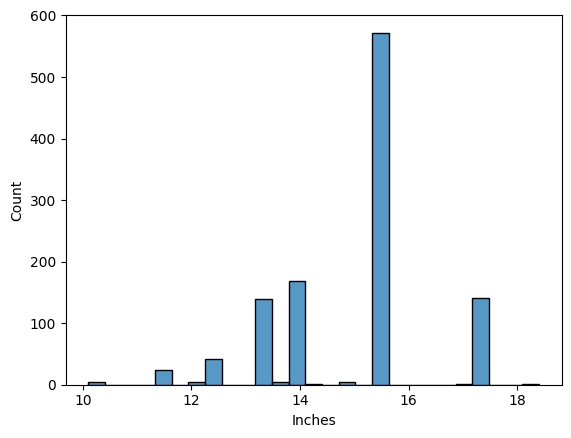

In [670]:
sns.histplot(dataframe['Inches'])

In [671]:
dataframe.isna().sum()

laptop_ID            0
Company              0
Product              0
TypeName             0
Inches               0
ScreenResolution    11
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys               53
Weight              22
Price_euros          0
dtype: int64

In [672]:
df_nan = dataframe.loc[:, dataframe.isnull().any()]
df_nan.head(10)

,ScreenResolution,OpSys,Weight
0,1440x900,macOS,1.34kg
1,IPS Panel Retina Display 2880x1800,macOS,1.83kg
2,IPS Panel Retina Display 2560x1600,macOS,1.37kg
3,1366x768,Windows 10,2.1kg
4,IPS Panel Retina Display 2880x1800,Mac OS X,2.04kg
5,Full HD 1920x1080,Windows 10,1.3kg
6,1366x768,No OS,1.86kg
7,Full HD 1920x1080,No OS,1.86kg
8,IPS Panel Retina Display 2880x1800,NaN,1.83kg
9,Full HD 1920x1080,Windows 10,2.2kg


In [673]:
df_nan.isnull().sum() / len(df_nan) * 100


ScreenResolution    0.992780
OpSys               4.783394
Weight              1.985560
dtype: float64

In [674]:
dataframe['OpSys'].value_counts()

Windows 10      864
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64

In [675]:
dataframe[dataframe['OpSys'].isna()].head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
8,13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,NaN,1.83kg,2439.97
10,15,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,NaN,0.92kg,1262.40
30,38,Dell,Inspiron 5770,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,NaN,2.8kg,979.00
32,40,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce 930MX,NaN,2.1kg,879.00
39,48,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,NaN,3.2kg,1299.00


In [676]:
dataframe[dataframe['Company'] == 'Apple']['OpSys'].fillna('macOS', inplace = True)
dataframe['OpSys'].fillna(dataframe['OpSys'].mode()[0], inplace= True)
modeOpSys = dataframe['OpSys'].mode()[0]

/tmp/ipykernel_10347/4106675023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Company'] == 'Apple']['OpSys'].fillna('macOS', inplace = True)


In [677]:
dataframe['ScreenResolution'].fillna(dataframe['ScreenResolution'].mode()[0], inplace=True)
screanMode = dataframe['ScreenResolution'].mode()[0]

In [678]:
def get_value(x):
    gb = 0
    tb = 0
    if ('GB' in x):
        gb = float(x.split('GB')[0])
    if ('TB' in x):
        tb = float(x.split('TB')[0])
    return gb + tb * 1024

In [679]:
def workWithMemory(x) -> pd.DataFrame:
    hdd, ssd, flash = 0, 0, 0
    x = x.split(' + ')
    for memory in x:
        if ('Flash' in memory):
            value = memory.split('Flash')[0]
            flash += get_value(memory)
        if ('SSD' in memory):
            value = memory.split('SSD')[0]
            ssd += get_value(memory)
        if ('HDD' in memory):
            value = memory.split('HDD')[0]
            hdd += get_value(memory)
    return {'hdd': hdd, 'ssd': ssd, 'flash': flash}

### Очистка данных

1. Приводим Вес к числовому типу.


In [680]:
dataframe['Weight'] = dataframe['Weight'].str.replace('kg', '')
dataframe['Weight'] = dataframe['Weight'].astype(float)

In [681]:
weightMean = dataframe[dataframe['Weight'].isna() == False]['Weight'].mean()
dataframe['Weight'].fillna(weightMean, inplace=True)

In [682]:
dataframe.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

<AxesSubplot: xlabel='Weight', ylabel='Count'>

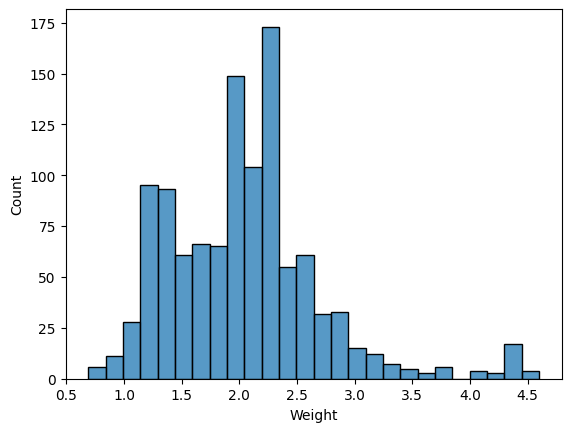

In [683]:
sns.histplot(dataframe['Weight'])

<AxesSubplot: >

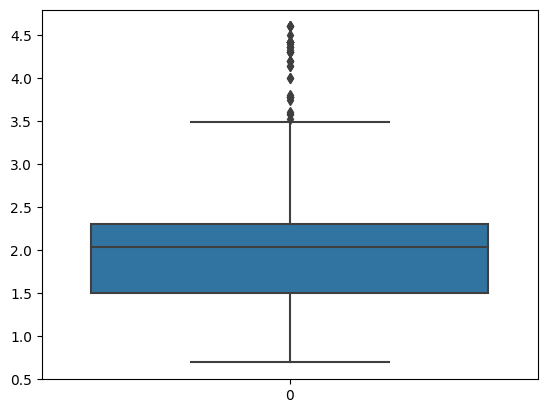

In [684]:
sns.boxplot(dataframe['Weight'])

2. Добавляем две новые колонки Ширина и Высота экрана.

In [685]:
res = dataframe['ScreenResolution'].str.split(' ')
res = [r[-1].split('x') for r in res]
dataframe['ScreenW'] = [float(r[0]) for r in res]
dataframe['ScreenH'] = [float(r[1]) for r in res]

3. Добавляем колонку `Frequency` - частота процессора. Разделяем процессоры по производителю.

In [686]:
cpu = dataframe['Cpu'].apply(lambda x : x.split(' '))
dataframe['Frequency'] = [float(str(freq[-1]).replace('GHz', '')) for freq in cpu]
dataframe['IntelCpu'] = dataframe['Cpu'].apply(lambda x : 1 if 'Intel' in x else 0)
dataframe['AMDCpu'] = dataframe['Cpu'].apply(lambda x : 1 if 'AMD' in x else 0)

<AxesSubplot: xlabel='Frequency', ylabel='Count'>

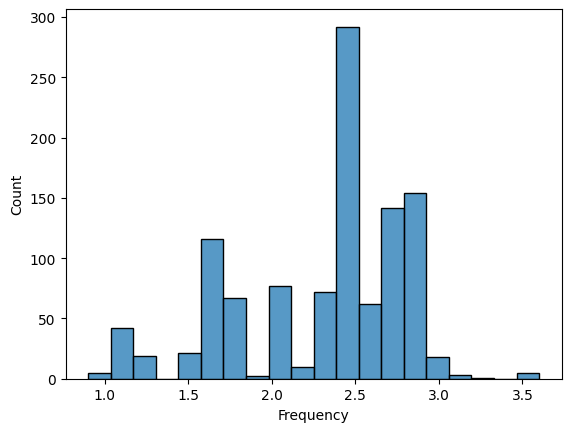

In [687]:
sns.histplot(dataframe['Frequency'])

4. Приводим ОЗУ к числовому типу

In [688]:
dataframe['Ram'] = dataframe['Ram'].str.replace('GB', '')
dataframe['Ram'] = dataframe['Ram'].astype(float)

<AxesSubplot: xlabel='Ram', ylabel='Count'>

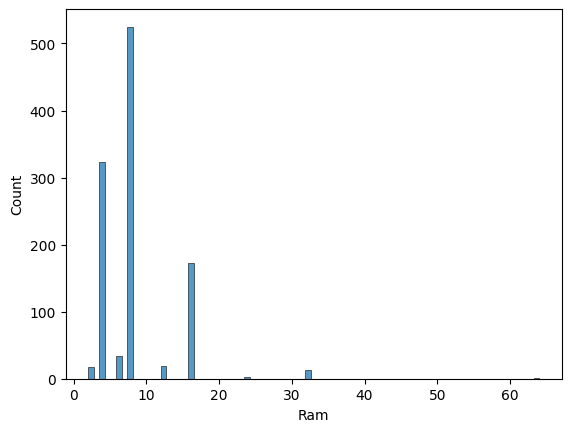

In [689]:
sns.histplot(dataframe['Ram'])

5. Разделяем память на типы `Flash` , `SSD` ,`HDD`.

In [690]:
data_memory = {i: workWithMemory(dataframe['Memory'].values[i]) for i in range(dataframe.shape[0])}
data_memory = pd.DataFrame(data_memory).T
dataframe = pd.merge(dataframe, data_memory, left_index=True, right_index=True, how='left')

6. Разделяем видеокарты по производителям. 

In [691]:
dataframe['Gpu'] = dataframe['Gpu'].apply(lambda x : x.split()[0])
dataframe['Intel'] = dataframe['Gpu'].apply(lambda x : 1 if 'Intel' in x else 0)
dataframe['NVidia'] = dataframe['Gpu'].apply(lambda x : 1 if 'Nvidia' in x else 0)
dataframe['AMD'] = dataframe['Gpu'].apply(lambda x : 1 if 'AMD' in x else 0)

In [692]:
# dataframe['SquaredScreen'] = dataframe['ScreenW'] * dataframe['ScreenH'] / dataframe['Inches']
# dataframe['InchesWeight'] = dataframe['Weight'] * dataframe['Inches']
# dataframe.drop(['Weight', 'Inches'], axis= 1, inplace= True)

Оставляем только числовые признаки. 

In [696]:
dataframe = dataframe.select_dtypes(np.number)

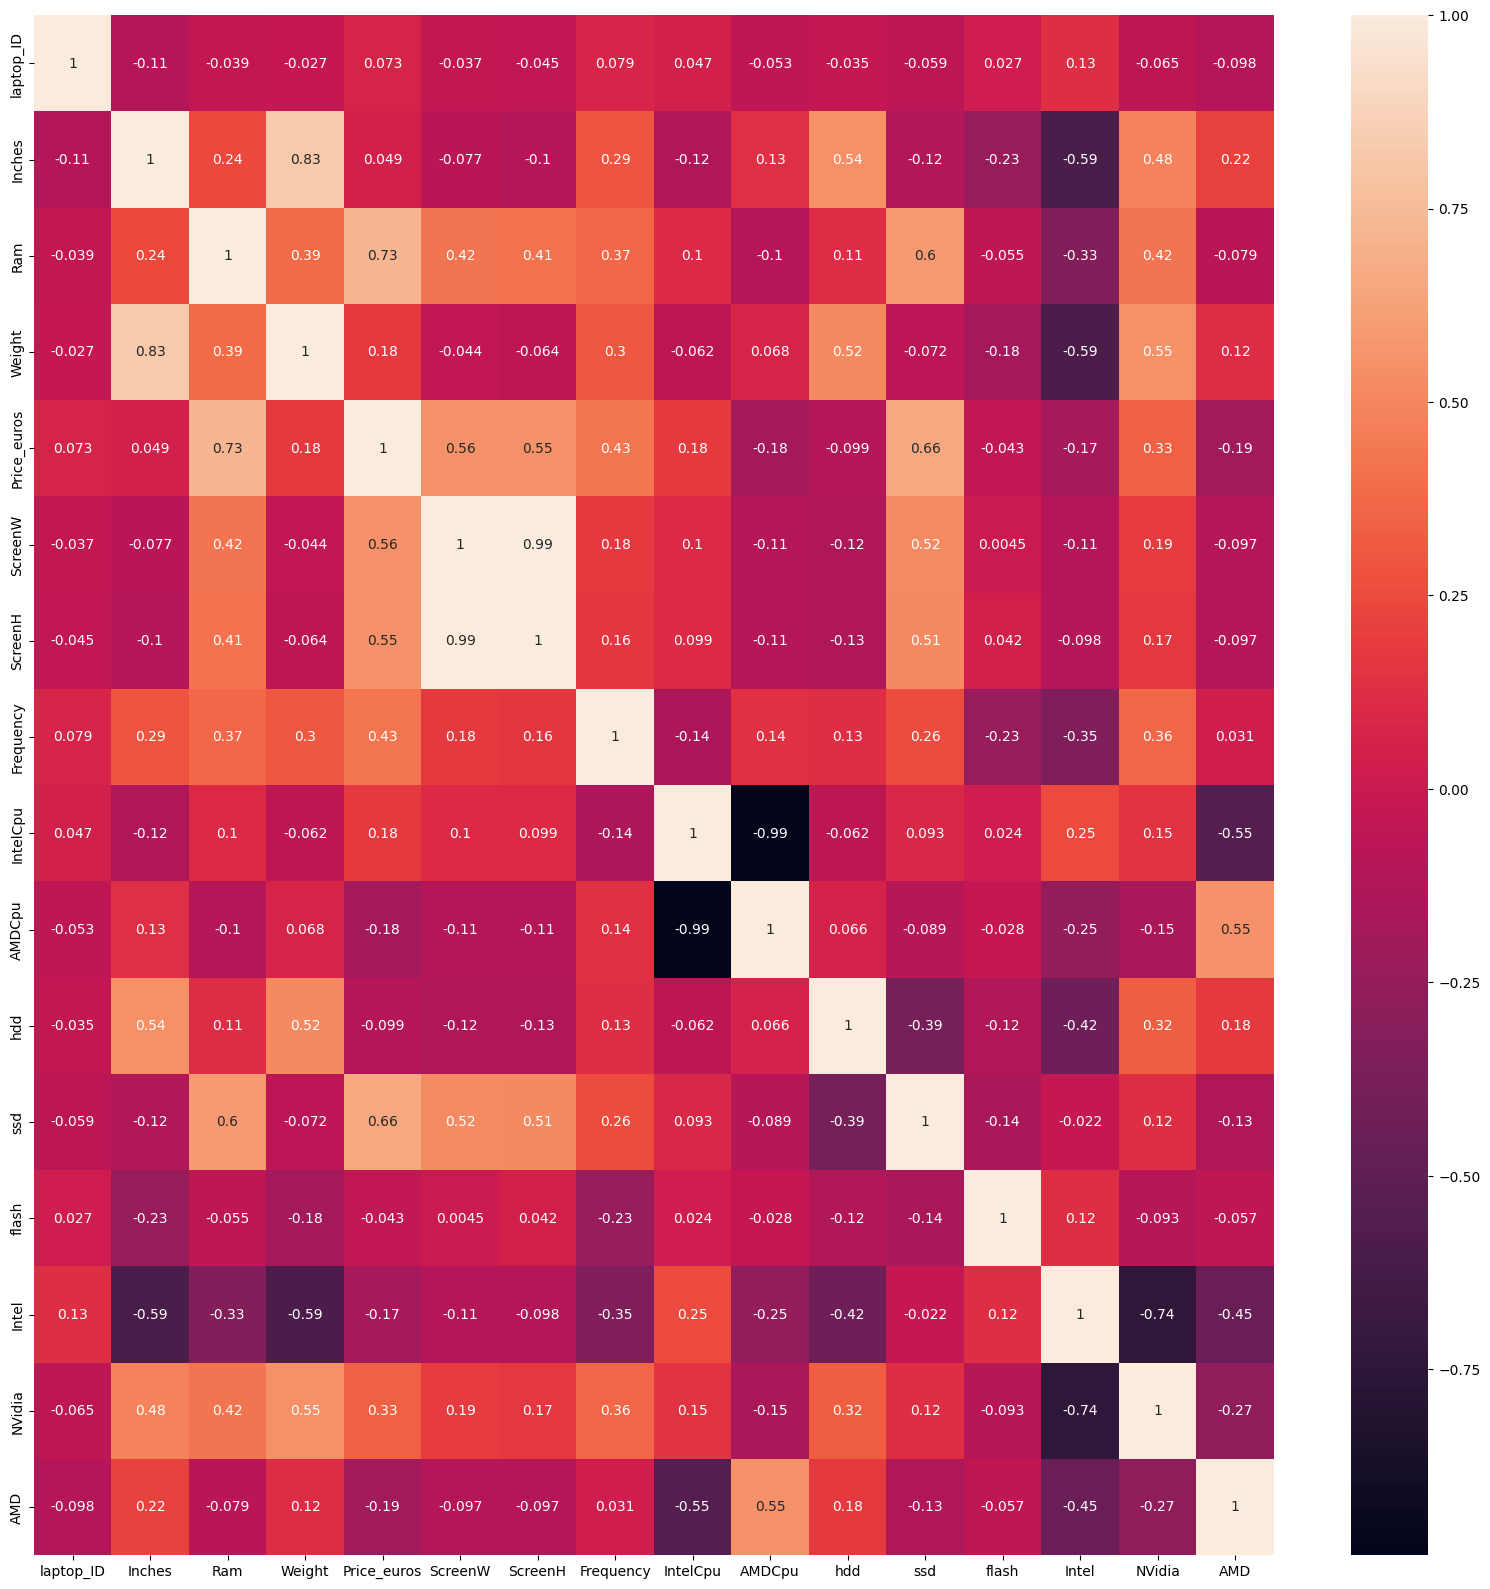

In [697]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataframe.corr(), annot=True)
None

In [698]:
dataframe.head(5)

,laptop_ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Frequency,IntelCpu,AMDCpu,hdd,ssd,flash,Intel,NVidia,AMD
0,2,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,1,0,0.0,0.0,128.0,1,0,0
1,4,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,1,0,0.0,512.0,0.0,0,0,1
2,5,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,1,0,0.0,256.0,0.0,1,0,0
3,6,15.6,4.0,2.10,400.00,1366.0,768.0,3.0,0,1,500.0,0.0,0.0,0,0,1
4,7,15.4,16.0,2.04,2139.97,2880.0,1800.0,2.2,1,0,0.0,0.0,256.0,1,0,0


In [699]:
y = dataframe['Price_euros']

dataframe = dataframe.drop(['Price_euros','laptop_ID'], axis=1)

### Разделение на train и test выборку

In [702]:
from sklearn.model_selection import train_test_split

X = dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


### Обучение модели

In [703]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [704]:
y_pred = model.predict(X_test)

### Просмотр различных метрик

`MAE` - средняя абсолютная ошибка 
 `MSE` - средняя квадратичная ошибка
 `R2` - коэффициент детерминации

In [705]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 276.4269602023669
MSE 171818.99484017177
R2 Score: 0.6644962883086118


### Кросс-валидация

In [706]:
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [707]:
lin_reg = LinearRegression()

scores = cross_val_score(model, X, y, cv = kf, scoring = 'r2')
scores.mean()

0.6798695569321529

In [708]:
model = model.fit(X, y)

### Подготовка тестовых данных

In [709]:
testdf = pd.read_csv('./data/Price_euros_test.csv')

In [710]:
testdf[testdf['Company'] == 'Apple']['OpSys'].fillna('macOS', inplace = True)
testdf['OpSys'].fillna(modeOpSys, inplace= True)
testdf['ScreenResolution'].fillna(screanMode, inplace=True)

/tmp/ipykernel_10347/1679559552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf[testdf['Company'] == 'Apple']['OpSys'].fillna('macOS', inplace = True)


In [711]:
testdf.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              4
dtype: int64

In [712]:
testdf['Weight'] = testdf['Weight'].str.replace('kg', '')
testdf['Weight'] = testdf['Weight'].astype(float)
testdf['Weight'].fillna(weightMean, inplace=True)

In [713]:
testdf.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64

In [714]:
res = testdf['ScreenResolution'].str.split(' ')
res = [r[-1].split('x') for r in res]
testdf['ScreenW'] = [float(r[0]) for r in res]
testdf['ScreenH'] = [float(r[1]) for r in res]

In [715]:
cpu = testdf['Cpu'].apply(lambda x : x.split(' '))
testdf['Frequency'] = [float(str(freq[-1]).replace('GHz', '')) for freq in cpu]
testdf['IntelCpu'] = testdf['Cpu'].apply(lambda x : 1 if 'Intel' in x else 0)
testdf['AMDCpu'] = testdf['Cpu'].apply(lambda x : 1 if 'AMD' in x else 0)

In [716]:
testdf['Ram'] = testdf['Ram'].str.replace('GB', '')
testdf['Ram'] = testdf['Ram'].astype(float)

In [717]:
data_memory = {i: workWithMemory(testdf['Memory'].values[i]) for i in range(testdf.shape[0])}
data_memory = pd.DataFrame(data_memory).T
testdf = pd.merge(testdf, data_memory, left_index=True, right_index=True, how='left')

In [718]:
testdf['Gpu'] = testdf['Gpu'].apply(lambda x : x.split()[0])
testdf['Intel'] = testdf['Gpu'].apply(lambda x : 1 if 'Intel' in x else 0)
testdf['NVidia'] = testdf['Gpu'].apply(lambda x : 1 if 'Nvidia' in x else 0)
testdf['AMD'] = testdf['Gpu'].apply(lambda x : 1 if 'AMD' in x else 0)

In [719]:
# testdf.drop(['Weight', 'Inches'], axis= 1, inplace= True)

In [720]:
# for col in columns:
#     ohe = pd.get_dummies(testdf[col])
#     testdf = pd.merge(testdf, ohe, left_index=True, right_index=True)
#     testdf.drop(columns=[col], inplace=True)

In [721]:
testdf = testdf.select_dtypes(np.number)
testdf.drop('laptop_ID', axis= 1, inplace= True)

In [722]:
dataframe.head(5)

,Inches,Ram,Weight,ScreenW,ScreenH,Frequency,IntelCpu,AMDCpu,hdd,ssd,flash,Intel,NVidia,AMD
0,13.3,8.0,1.34,1440.0,900.0,1.8,1,0,0.0,0.0,128.0,1,0,0
1,15.4,16.0,1.83,2880.0,1800.0,2.7,1,0,0.0,512.0,0.0,0,0,1
2,13.3,8.0,1.37,2560.0,1600.0,3.1,1,0,0.0,256.0,0.0,1,0,0
3,15.6,4.0,2.10,1366.0,768.0,3.0,0,1,500.0,0.0,0.0,0,0,1
4,15.4,16.0,2.04,2880.0,1800.0,2.2,1,0,0.0,0.0,256.0,1,0,0


In [723]:
testdf.head(5)

,Inches,Ram,Weight,ScreenW,ScreenH,Frequency,IntelCpu,AMDCpu,hdd,ssd,flash,Intel,NVidia,AMD
0,15.6,4.0,2.10,1366.0,768.0,3.0,0,1,1024.0,0.0,0.0,0,0,1
1,14.0,16.0,1.95,1920.0,1080.0,2.8,1,0,0.0,1024.0,0.0,0,1,0
2,15.6,8.0,1.70,1920.0,1080.0,1.8,1,0,0.0,256.0,0.0,0,1,0
3,17.3,16.0,2.99,1920.0,1080.0,2.8,1,0,1024.0,256.0,0.0,0,1,0
4,15.6,12.0,2.25,1366.0,768.0,2.5,1,0,1024.0,0.0,0.0,1,0,0


In [724]:
# testdf_std = std.fit_transform(testdf)
# minmax = MinMaxScaler()
# cat_columns = ['IntelCpu',	'AMDCpu', 'Intel', 'NVidia', 'AMD']
# X = dataframe
# testdf_std = minmax.fit_transform(testdf.drop(cat_columns, axis=1))
# tesdtf_std = pd.DataFrame(testdf_std, columns=X.drop(cat_columns, axis=1).columns)

In [725]:
# for col in testdf.columns:
#     if col not in cat_columns:
#         testdf[col] = tesdtf_std[col]

In [726]:
y_ans = model.predict(testdf)

In [727]:
y_ans = pd.DataFrame(y_ans, columns=['Price_euros'])

In [728]:
y_ans.to_csv('ans.csv')